# Projet long du Master IMSD de l'univérsité lorraine.

# Accidents corporels en France (2020)

#    1.Data introduction 

# Préparation des données partie I

In [1]:
#linear algebra
import numpy as np
#data processing
import pandas as pd

In [2]:
pep = pd.read_csv("usagers-2020.csv",delimiter=";")
vec = pd.read_csv("vehicules-2020.csv",delimiter=";")
loc = pd.read_csv("lieux-2020.csv", delimiter=";")
road = pd.read_csv("caracteristiques-2020.csv",delimiter=";")

In [3]:
pep

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202000000001,154 742 274,B01,1,1,1,1,1983,5,1,0,-1,-1,-1,-1
1,202000000001,154 742 275,A01,1,1,3,1,1982,5,2,6,-1,-1,-1,-1
2,202000000002,154 742 273,A01,1,1,1,1,1997,1,8,0,-1,-1,-1,-1
3,202000000002,154 742 273,A01,10,3,4,1,1967,5,0,-1,-1,3,3,1
4,202000000003,154 742 271,B01,1,1,1,1,1985,0,1,0,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105290,202000047743,154 658 351,B01,4,2,4,1,2011,5,1,0,-1,0,0,-1
105291,202000047743,154 658 351,B01,1,1,4,2,1981,5,1,0,-1,0,0,-1
105292,202000047743,154 658 352,A01,1,1,4,1,1998,9,1,0,-1,0,0,-1
105293,202000047744,154 658 350,A01,1,1,1,1,1967,9,2,0,-1,-1,-1,-1


In [4]:
vec

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202000000001,154 742 274,B01,1,7,0,2,2,15,1,NaN
1,202000000001,154 742 275,A01,1,33,0,2,1,2,1,NaN
2,202000000002,154 742 273,A01,3,7,0,1,2,26,1,NaN
3,202000000003,154 742 271,B01,1,7,0,2,1,1,1,NaN
4,202000000003,154 742 272,A01,1,7,0,2,8,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
81061,202000047742,154 658 354,A01,2,7,0,2,3,0,1,NaN
81062,202000047742,154 658 355,B01,1,7,0,2,8,1,3,NaN
81063,202000047743,154 658 351,B01,1,7,0,2,4,23,1,NaN
81064,202000047743,154 658 352,A01,1,7,0,2,1,2,1,NaN


In [5]:
loc

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202000000001,4,HENRI BARBUSSE (AVENUE),0,NaN,2,2,0,1,0,0,1,NaN,-1,1,0,1,50
1,202000000002,4,MOUSSEAUX(CHEMIN),0,NaN,2,2,0,1,0,100,3,NaN,-1,1,0,1,50
2,202000000003,4,CARNOT(AVENUE),0,NaN,-1,2,0,1,0,0,1,NaN,-1,1,0,1,50
3,202000000004,4,VICTOR HUGO (AVENUE),0,NaN,2,2,0,1,1,0,1,NaN,-1,1,0,1,30
4,202000000005,3,35,0,NaN,1,1,0,1,4,674,2,NaN,-1,1,3,8,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47739,202000047740,3,141,0,NaN,1,1,0,1,0,0,1,NaN,-1,1,0,1,50
47740,202000047741,3,CASTAGNINS (ROUTE DES),0,NaN,4,2,0,2,1,530,1,NaN,-1,1,0,1,30
47741,202000047742,3,MADELEINE,0,NaN,2,2,0,2,0,0,3,NaN,-1,1,0,1,50
47742,202000047743,3,900,0,B,2,2,0,1,0,650,1,NaN,-1,1,0,1,50


In [6]:
road

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202000000001,7,3,2020,16:55,1,91,91657,2,3,1,3,HENRI BARBUSSE (AVENUE),"48,7053500","2,4384100"
1,202000000002,7,3,2020,08:35,2,91,91657,2,9,7,6,MOUSSEAUX(CHEMIN),"48,6900000","2,4100000"
2,202000000003,7,3,2020,13:30,1,91,91174,2,2,1,3,CARNOT(AVENUE),"48,6106700","2,4758200"
3,202000000004,7,3,2020,18:50,5,91,91215,2,1,1,6,VICTOR HUGO (AVENUE),"48,6978200","2,5244600"
4,202000000005,7,3,2020,11:00,1,77,77181,1,6,1,2,LAGNY (RUE DE ) - D35,"48,8286457","2,7059707"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47739,202000047740,30,11,2020,07:50,1,13,13028,2,1,1,4,PUITS DE BRUNET (CHEMIN DU),"43,1865750","5,6003810"
47740,202000047741,30,11,2020,17:00,2,06,06083,2,1,9,3,CASTAGNINS (ROUTE DES),"43,7799570","7,4818980"
47741,202000047742,1,12,2020,10:00,1,06,06069,2,1,1,5,MADELEINE,"43,6571157","6,9337155"
47742,202000047743,28,11,2020,11:45,1,05,05061,1,1,1,2,Bernard GIVAUDAN (Avenue) D900B,"44,5406800","6,0641900"


In [7]:
# merge all files together on the 'Num_Acc' key
df = pd.merge(pep, vec, on=['Num_Acc','Num_Acc'])
df = pd.merge(df, loc, on=['Num_Acc','Num_Acc'])
df = pd.merge(df, road, on=['Num_Acc','Num_Acc'])

In [8]:
df

,Num_Acc,id_vehicule_x,num_veh_x,place,catu,grav,sexe,an_nais,trajet,secu1,...,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202000000001,154 742 274,B01,1,1,1,1,1983,5,1,...,1,91,91657,2,3,1,3,HENRI BARBUSSE (AVENUE),"48,7053500","2,4384100"
1,202000000001,154 742 274,B01,1,1,1,1,1983,5,1,...,1,91,91657,2,3,1,3,HENRI BARBUSSE (AVENUE),"48,7053500","2,4384100"
2,202000000001,154 742 275,A01,1,1,3,1,1982,5,2,...,1,91,91657,2,3,1,3,HENRI BARBUSSE (AVENUE),"48,7053500","2,4384100"
3,202000000001,154 742 275,A01,1,1,3,1,1982,5,2,...,1,91,91657,2,3,1,3,HENRI BARBUSSE (AVENUE),"48,7053500","2,4384100"
4,202000000002,154 742 273,A01,1,1,1,1,1997,1,8,...,2,91,91657,2,9,7,6,MOUSSEAUX(CHEMIN),"48,6900000","2,4100000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198902,202000047743,154 658 351,B01,1,1,4,2,1981,5,1,...,1,05,05061,1,1,1,2,Bernard GIVAUDAN (Avenue) D900B,"44,5406800","6,0641900"
198903,202000047743,154 658 352,A01,1,1,4,1,1998,9,1,...,1,05,05061,1,1,1,2,Bernard GIVAUDAN (Avenue) D900B,"44,5406800","6,0641900"
198904,202000047743,154 658 352,A01,1,1,4,1,1998,9,1,...,1,05,05061,1,1,1,2,Bernard GIVAUDAN (Avenue) D900B,"44,5406800","6,0641900"
198905,202000047744,154 658 350,A01,1,1,1,1,1967,9,2,...,4,05,05061,2,1,1,6,JEAN MACE ( RUE ),"44,5614810","6,0740270"


In [9]:
#La variable 'Num_Acc' nous intéresse plus
#On la supprime 
df = df.drop(['Num_Acc'], axis=1)
#df

In [10]:
df.shape

(198907, 55)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198907 entries, 0 to 198906
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_vehicule_x  198907 non-null  object 
 1   num_veh_x      198907 non-null  object 
 2   place          198907 non-null  int64  
 3   catu           198907 non-null  int64  
 4   grav           198907 non-null  int64  
 5   sexe           198907 non-null  int64  
 6   an_nais        198907 non-null  int64  
 7   trajet         198907 non-null  int64  
 8   secu1          198907 non-null  int64  
 9   secu2          198907 non-null  int64  
 10  secu3          198907 non-null  int64  
 11  locp           198907 non-null  int64  
 12  actp           198907 non-null  object 
 13  etatp          198907 non-null  int64  
 14  id_vehicule_y  198907 non-null  object 
 15  num_veh_y      198907 non-null  object 
 16  senc           198907 non-null  int64  
 17  catv           198907 non-nul

In [12]:
v1=df['v1']
v1
#v1 est presque vide

0         0
1         0
2         0
3         0
4         0
         ..
198902    0
198903    0
198904    0
198905    0
198906    0
Name: v1, Length: 198907, dtype: int64

In [13]:
df.loc[df['etatp'] == -1.0]

#presque idem la variable etatp prend presque toujours -1

,id_vehicule_x,num_veh_x,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,...,lum,dep,com,agg,int,atm,col,adr,lat,long
0,154 742 274,B01,1,1,1,1,1983,5,1,0,...,1,91,91657,2,3,1,3,HENRI BARBUSSE (AVENUE),"48,7053500","2,4384100"
1,154 742 274,B01,1,1,1,1,1983,5,1,0,...,1,91,91657,2,3,1,3,HENRI BARBUSSE (AVENUE),"48,7053500","2,4384100"
2,154 742 275,A01,1,1,3,1,1982,5,2,6,...,1,91,91657,2,3,1,3,HENRI BARBUSSE (AVENUE),"48,7053500","2,4384100"
3,154 742 275,A01,1,1,3,1,1982,5,2,6,...,1,91,91657,2,3,1,3,HENRI BARBUSSE (AVENUE),"48,7053500","2,4384100"
4,154 742 273,A01,1,1,1,1,1997,1,8,0,...,2,91,91657,2,9,7,6,MOUSSEAUX(CHEMIN),"48,6900000","2,4100000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198901,154 658 351,B01,1,1,4,2,1981,5,1,0,...,1,05,05061,1,1,1,2,Bernard GIVAUDAN (Avenue) D900B,"44,5406800","6,0641900"
198902,154 658 351,B01,1,1,4,2,1981,5,1,0,...,1,05,05061,1,1,1,2,Bernard GIVAUDAN (Avenue) D900B,"44,5406800","6,0641900"
198903,154 658 352,A01,1,1,4,1,1998,9,1,0,...,1,05,05061,1,1,1,2,Bernard GIVAUDAN (Avenue) D900B,"44,5406800","6,0641900"
198904,154 658 352,A01,1,1,4,1,1998,9,1,0,...,1,05,05061,1,1,1,2,Bernard GIVAUDAN (Avenue) D900B,"44,5406800","6,0641900"


In [14]:
v2=df['v2']
v2


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
198902      B
198903      B
198904      B
198905    NaN
198906    NaN
Name: v2, Length: 198907, dtype: object

In [15]:
#Percentage of missing values
totalmissingvalues=v2.isnull().sum()
Numbermissingvalues=v2.isnull().count()
Percentage=totalmissingvalues/Numbermissingvalues*100
Percentagearrondi=round(Percentage,1)#Arrondir le nombre de chiffres après la virgule à 1
Percentagesorted=Percentagearrondi
Percentagesorted
#v2 est presque vide aussi puisque il contient plus de valeurs manquantes 

93.7

In [16]:
lartpc=df['lartpc']
lartpc

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
198902    NaN
198903    NaN
198904    NaN
198905    NaN
198906    NaN
Name: lartpc, Length: 198907, dtype: object

In [17]:
larrout=df['larrout']
larrout

0          -1
1          -1
2          -1
3          -1
4          -1
         ... 
198902     -1
198903     -1
198904     -1
198905     -1
198906     -1
Name: larrout, Length: 198907, dtype: object

In [18]:
pr=df['pr']
pr
#pr est presque vide 

0         0
1         0
2         0
3         0
4         0
         ..
198902    0
198903    0
198904    0
198905    0
198906    0
Name: pr, Length: 198907, dtype: object

In [19]:
df = df.drop(['etatp','lartpc','larrout','an','jour','adr', 'lat','long','v1','v2','vosp','pr','pr1','num_veh_x','num_veh_y','senc','situ'], axis=1)
df

,id_vehicule_x,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,...,vma,mois,hrmn,lum,dep,com,agg,int,atm,col
0,154 742 274,1,1,1,1,1983,5,1,0,-1,...,50,3,16:55,1,91,91657,2,3,1,3
1,154 742 274,1,1,1,1,1983,5,1,0,-1,...,50,3,16:55,1,91,91657,2,3,1,3
2,154 742 275,1,1,3,1,1982,5,2,6,-1,...,50,3,16:55,1,91,91657,2,3,1,3
3,154 742 275,1,1,3,1,1982,5,2,6,-1,...,50,3,16:55,1,91,91657,2,3,1,3
4,154 742 273,1,1,1,1,1997,1,8,0,-1,...,50,3,08:35,2,91,91657,2,9,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198902,154 658 351,1,1,4,2,1981,5,1,0,-1,...,50,11,11:45,1,05,05061,1,1,1,2
198903,154 658 352,1,1,4,1,1998,9,1,0,-1,...,50,11,11:45,1,05,05061,1,1,1,2
198904,154 658 352,1,1,4,1,1998,9,1,0,-1,...,50,11,11:45,1,05,05061,1,1,1,2
198905,154 658 350,1,1,1,1,1967,9,2,0,-1,...,30,11,17:44,4,05,05061,2,1,1,6


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198907 entries, 0 to 198906
Data columns (total 38 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_vehicule_x  198907 non-null  object 
 1   place          198907 non-null  int64  
 2   catu           198907 non-null  int64  
 3   grav           198907 non-null  int64  
 4   sexe           198907 non-null  int64  
 5   an_nais        198907 non-null  int64  
 6   trajet         198907 non-null  int64  
 7   secu1          198907 non-null  int64  
 8   secu2          198907 non-null  int64  
 9   secu3          198907 non-null  int64  
 10  locp           198907 non-null  int64  
 11  actp           198907 non-null  object 
 12  id_vehicule_y  198907 non-null  object 
 13  catv           198907 non-null  int64  
 14  obs            198907 non-null  int64  
 15  obsm           198907 non-null  int64  
 16  choc           198907 non-null  int64  
 17  manv           198907 non-nul

In [21]:
df.shape

(198907, 38)

In [22]:
df.dtypes # tells us the type for each column


id_vehicule_x     object
place              int64
catu               int64
grav               int64
sexe               int64
an_nais            int64
trajet             int64
secu1              int64
secu2              int64
secu3              int64
locp               int64
actp              object
id_vehicule_y     object
catv               int64
obs                int64
obsm               int64
choc               int64
manv               int64
motor              int64
occutc           float64
catr               int64
voie              object
circ               int64
nbv                int64
prof               int64
plan               int64
surf               int64
infra              int64
vma                int64
mois               int64
hrmn              object
lum                int64
dep               object
com               object
agg                int64
int                int64
atm                int64
col                int64
dtype: object

In [ ]:
# cast categorical variables to string
df['place'] = df['place'].astype(object)
df['catu'] = df['catu'].astype(object)
df['grav'] = df['grav'].astype(object)
df['sexe'] = df['catu'].astype(object)
#df['an_nais'] = df['an_nais'].astype(object)

df['trajet'] = df['trajet'].astype(object)
df['secu1'] = df['secu1'].astype(object)
df['secu2'] = df['secu2'].astype(object)
df['secu3'] = df['secu3'].astype(object)
df['locp'] = df['locp'].astype(object)



df['catv'] = df['catv'].astype(object)
df['obs'] = df['obs'].astype(object)
df['obsm'] = df['obsm'].astype(object)
df['choc'] = df['choc'].astype(object)
df['manv'] = df['manv'].astype(object)
df['motor'] = df['motor'].astype(object)
df['occutc'] = df['occutc'].astype(object)
df['voie'] = df['voie'].astype(object)


df['nbv'] = df['nbv'].astype(object)
df['vma'] = df['vma'].astype(object)





df['catr'] = df['catr'].astype(object)
df['circ'] = df['circ'].astype(object)
df['prof'] = df['prof'].astype(object)
df['plan'] = df['plan'].astype(object)
df['surf'] = df['surf'].astype(object)
df['infra'] = df['infra'].astype(object)
df['mois'] = df['mois'].astype(object)
df['lum'] = df['lum'].astype(object)
df['agg'] = df['agg'].astype(object)
df['int'] = df['int'].astype(object)
df['atm'] = df['atm'].astype(object)
df['col'] = df['col'].astype(object)

In [ ]:
df.dtypes

id_vehicule_x    object
place            object
catu             object
grav             object
sexe             object
an_nais          object
trajet           object
secu1            object
secu2            object
secu3            object
locp             object
actp             object
id_vehicule_y    object
catv             object
obs              object
obsm             object
choc             object
manv             object
motor            object
occutc           object
catr             object
voie             object
circ             object
nbv              object
prof             object
plan             object
surf             object
infra            object
vma              object
mois             object
hrmn             object
lum              object
dep              object
com              object
agg              object
int              object
atm              object
col              object
dtype: object

In [23]:
df

,id_vehicule_x,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,...,vma,mois,hrmn,lum,dep,com,agg,int,atm,col
0,154 742 274,1,1,1,1,1983,5,1,0,-1,...,50,3,16:55,1,91,91657,2,3,1,3
1,154 742 274,1,1,1,1,1983,5,1,0,-1,...,50,3,16:55,1,91,91657,2,3,1,3
2,154 742 275,1,1,3,1,1982,5,2,6,-1,...,50,3,16:55,1,91,91657,2,3,1,3
3,154 742 275,1,1,3,1,1982,5,2,6,-1,...,50,3,16:55,1,91,91657,2,3,1,3
4,154 742 273,1,1,1,1,1997,1,8,0,-1,...,50,3,08:35,2,91,91657,2,9,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198902,154 658 351,1,1,4,2,1981,5,1,0,-1,...,50,11,11:45,1,05,05061,1,1,1,2
198903,154 658 352,1,1,4,1,1998,9,1,0,-1,...,50,11,11:45,1,05,05061,1,1,1,2
198904,154 658 352,1,1,4,1,1998,9,1,0,-1,...,50,11,11:45,1,05,05061,1,1,1,2
198905,154 658 350,1,1,1,1,1967,9,2,0,-1,...,30,11,17:44,4,05,05061,2,1,1,6


In [24]:
# identifies which columns have many different values
columns = list(df)
for i in columns: 
    if df[i].value_counts().size > 10:
        print (i + " " + str(df[i].value_counts().size))

id_vehicule_x 79167
an_nais 103
secu1 11
secu2 11
secu3 11
locp 11
actp 13
id_vehicule_y 81066
catv 32
obs 19
choc 11
manv 28
occutc 18
voie 10307
nbv 14
infra 11
vma 28
mois 12
hrmn 1356
dep 107
com 10338


In [25]:
df = df.copy()  

In [26]:
#on commence par les secu
# Caculer la moyenne des 3 variables secu
df['secu'] = (df['secu1'] + df['secu2'] + df['secu3'])/3

In [27]:
#Test
print(df.dtypes)
df.head()

id_vehicule_x     object
place              int64
catu               int64
grav               int64
sexe               int64
an_nais            int64
trajet             int64
secu1              int64
secu2              int64
secu3              int64
locp               int64
actp              object
id_vehicule_y     object
catv               int64
obs                int64
obsm               int64
choc               int64
manv               int64
motor              int64
occutc           float64
catr               int64
voie              object
circ               int64
nbv                int64
prof               int64
plan               int64
surf               int64
infra              int64
vma                int64
mois               int64
hrmn              object
lum                int64
dep               object
com               object
agg                int64
int                int64
atm                int64
col                int64
secu             float64
dtype: object


,id_vehicule_x,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,...,mois,hrmn,lum,dep,com,agg,int,atm,col,secu
0,154 742 274,1,1,1,1,1983,5,1,0,-1,...,3,16:55,1,91,91657,2,3,1,3,0.000000
1,154 742 274,1,1,1,1,1983,5,1,0,-1,...,3,16:55,1,91,91657,2,3,1,3,0.000000
2,154 742 275,1,1,3,1,1982,5,2,6,-1,...,3,16:55,1,91,91657,2,3,1,3,2.333333
3,154 742 275,1,1,3,1,1982,5,2,6,-1,...,3,16:55,1,91,91657,2,3,1,3,2.333333
4,154 742 273,1,1,1,1,1997,1,8,0,-1,...,3,08:35,2,91,91657,2,9,7,6,2.333333


In [28]:
#on a plus besoin des variables secu1, secu2, secu3
df = df.drop(['secu1','secu2','secu3'], axis=1)
df

,id_vehicule_x,place,catu,grav,sexe,an_nais,trajet,locp,actp,id_vehicule_y,...,mois,hrmn,lum,dep,com,agg,int,atm,col,secu
0,154 742 274,1,1,1,1,1983,5,-1,-1,154 742 274,...,3,16:55,1,91,91657,2,3,1,3,0.000000
1,154 742 274,1,1,1,1,1983,5,-1,-1,154 742 275,...,3,16:55,1,91,91657,2,3,1,3,0.000000
2,154 742 275,1,1,3,1,1982,5,-1,-1,154 742 274,...,3,16:55,1,91,91657,2,3,1,3,2.333333
3,154 742 275,1,1,3,1,1982,5,-1,-1,154 742 275,...,3,16:55,1,91,91657,2,3,1,3,2.333333
4,154 742 273,1,1,1,1,1997,1,-1,-1,154 742 273,...,3,08:35,2,91,91657,2,9,7,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198902,154 658 351,1,1,4,2,1981,5,0,0,154 658 352,...,11,11:45,1,05,05061,1,1,1,2,0.000000
198903,154 658 352,1,1,4,1,1998,9,0,0,154 658 351,...,11,11:45,1,05,05061,1,1,1,2,0.000000
198904,154 658 352,1,1,4,1,1998,9,0,0,154 658 352,...,11,11:45,1,05,05061,1,1,1,2,0.000000
198905,154 658 350,1,1,1,1,1967,9,-1,-1,154 658 350,...,11,17:44,4,05,05061,2,1,1,6,0.333333


In [29]:
for index, row in df.iterrows():
    if row.locp == '1' or row.locp =='2': # group by "localisation sur chaussé"
        df.at[index,'locp'] = '1'
    if row.locp == '3' or row.locp== '4': # group by "localisation sur passage piéton"
        df.at[index,'locp'] = '2'
    if row.locp == '5' or row.locp=='6' or row.locp=='7' or row.locp== '8' or row.locp=='9': # group by "localisation est divers"
        df.at[index,'locp'] = '3'
    if row.locp == '0' or row.locp == '-1' : # group by null or other
        df.at[index,'locp'] = '99'

count    198907.000000
mean         -0.381560
std           0.994243
min          -1.000000
25%          -1.000000
50%          -1.000000
75%           0.000000
max           9.000000
Name: locp, dtype: float64

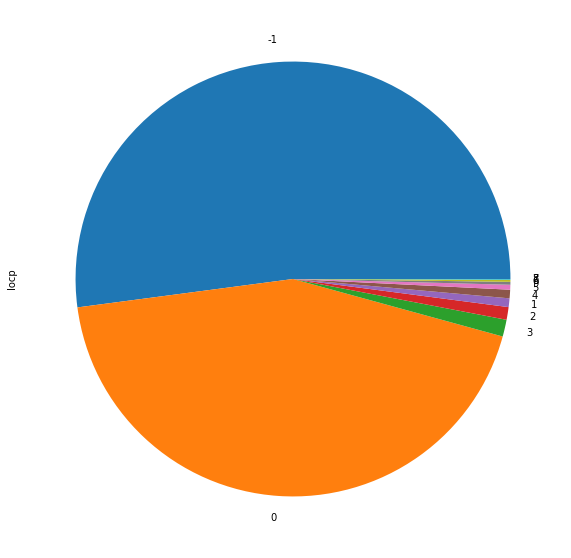

In [30]:
df.locp.value_counts().plot(kind='pie', figsize=(10, 10))
df['locp'].describe()

In [31]:
df = df.drop(['id_vehicule_x'], axis=1)
df = df.drop(['an_nais'], axis=1)
df = df.drop(['actp'], axis=1)
df = df.drop(['id_vehicule_y'], axis=1)
df = df.drop(['voie'], axis=1)
df = df.drop(['dep'], axis=1)
df = df.drop(['com'], axis=1)
df = df.drop(['manv'], axis=1)

In [32]:
df

,place,catu,grav,sexe,trajet,locp,catv,obs,obsm,choc,...,infra,vma,mois,hrmn,lum,agg,int,atm,col,secu
0,1,1,1,1,5,-1,7,0,2,2,...,0,50,3,16:55,1,2,3,1,3,0.000000
1,1,1,1,1,5,-1,33,0,2,1,...,0,50,3,16:55,1,2,3,1,3,0.000000
2,1,1,3,1,5,-1,7,0,2,2,...,0,50,3,16:55,1,2,3,1,3,2.333333
3,1,1,3,1,5,-1,33,0,2,1,...,0,50,3,16:55,1,2,3,1,3,2.333333
4,1,1,1,1,1,-1,7,0,1,2,...,0,50,3,08:35,2,2,9,7,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198902,1,1,4,2,5,0,7,0,2,1,...,0,50,11,11:45,1,1,1,1,2,0.000000
198903,1,1,4,1,9,0,7,0,2,4,...,0,50,11,11:45,1,1,1,1,2,0.000000
198904,1,1,4,1,9,0,7,0,2,1,...,0,50,11,11:45,1,1,1,1,2,0.000000
198905,1,1,1,1,9,-1,32,0,1,1,...,0,30,11,17:44,4,2,1,1,6,0.333333


In [33]:
df.loc[df['infra'] == 0]


,place,catu,grav,sexe,trajet,locp,catv,obs,obsm,choc,...,infra,vma,mois,hrmn,lum,agg,int,atm,col,secu
0,1,1,1,1,5,-1,7,0,2,2,...,0,50,3,16:55,1,2,3,1,3,0.000000
1,1,1,1,1,5,-1,33,0,2,1,...,0,50,3,16:55,1,2,3,1,3,0.000000
2,1,1,3,1,5,-1,7,0,2,2,...,0,50,3,16:55,1,2,3,1,3,2.333333
3,1,1,3,1,5,-1,33,0,2,1,...,0,50,3,16:55,1,2,3,1,3,2.333333
4,1,1,1,1,1,-1,7,0,1,2,...,0,50,3,08:35,2,2,9,7,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198902,1,1,4,2,5,0,7,0,2,1,...,0,50,11,11:45,1,1,1,1,2,0.000000
198903,1,1,4,1,9,0,7,0,2,4,...,0,50,11,11:45,1,1,1,1,2,0.000000
198904,1,1,4,1,9,0,7,0,2,1,...,0,50,11,11:45,1,1,1,1,2,0.000000
198905,1,1,1,1,9,-1,32,0,1,1,...,0,30,11,17:44,4,2,1,1,6,0.333333


In [34]:
df

,place,catu,grav,sexe,trajet,locp,catv,obs,obsm,choc,...,infra,vma,mois,hrmn,lum,agg,int,atm,col,secu
0,1,1,1,1,5,-1,7,0,2,2,...,0,50,3,16:55,1,2,3,1,3,0.000000
1,1,1,1,1,5,-1,33,0,2,1,...,0,50,3,16:55,1,2,3,1,3,0.000000
2,1,1,3,1,5,-1,7,0,2,2,...,0,50,3,16:55,1,2,3,1,3,2.333333
3,1,1,3,1,5,-1,33,0,2,1,...,0,50,3,16:55,1,2,3,1,3,2.333333
4,1,1,1,1,1,-1,7,0,1,2,...,0,50,3,08:35,2,2,9,7,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198902,1,1,4,2,5,0,7,0,2,1,...,0,50,11,11:45,1,1,1,1,2,0.000000
198903,1,1,4,1,9,0,7,0,2,4,...,0,50,11,11:45,1,1,1,1,2,0.000000
198904,1,1,4,1,9,0,7,0,2,1,...,0,50,11,11:45,1,1,1,1,2,0.000000
198905,1,1,1,1,9,-1,32,0,1,1,...,0,30,11,17:44,4,2,1,1,6,0.333333


In [35]:
df = df.drop(['infra'], axis=1)

In [36]:
for index, row in df.iterrows():
    if row.catv == '02': # group by small motorcycle
        df.at[index,'catv'] = '30'
    if row.catv == '31': # group by medium motorcycle
        df.at[index,'catv'] = '32'
    if row.catv == '33': # group by big motorcycle
        df.at[index,'catv'] = '34'
    if row.catv == '38': # group by bus
        df.at[index,'catv'] = '37'
    if row.catv == '04' or row.catv == '05' or row.catv == '06' or row.catv == '08' \
        or row.catv == '09' or row.catv == '18' or row.catv == '19': # group by null or other
        df.at[index,'catv'] = '99'

count    198907.000000
mean         12.008984
std          12.650095
min          -1.000000
25%           7.000000
50%           7.000000
75%          10.000000
max          99.000000
Name: catv, dtype: float64

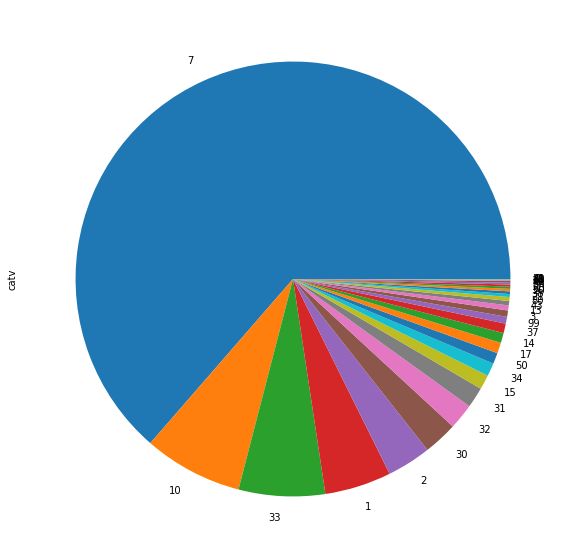

In [37]:
df.catv.value_counts().plot(kind='pie', figsize=(10, 10))
df['catv'].describe()

In [38]:
#pour la variable obs:
for index, row in df.iterrows():
    if row.obs == '1'or row.obs=='2': 
        df.at[index,'obs'] = '1'
    if row.obs == '3'or row.obs=='4'or row.obs=='5':
        df.at[index,'obs']= '3'
    if row.obs == '6'or row.obs=='7'or row.obs=='8'or row.obs=='9'or row.obs=='10'or row.obs=='11'or row.obs=='12'or row.obs=='13': 
        df.at[index,'obs'] = '6'
    if row.obs == '14'or row.obs=='15': 
        df.at[index,'obs'] = '15'
    if row.obs == '16'or row.obs=='17': 
        df.at[index,'obs'] = '16'
    else:
        df.at[index,'obs'] = '99'

count    198907.0
mean         99.0
std           0.0
min          99.0
25%          99.0
50%          99.0
75%          99.0
max          99.0
Name: obs, dtype: float64

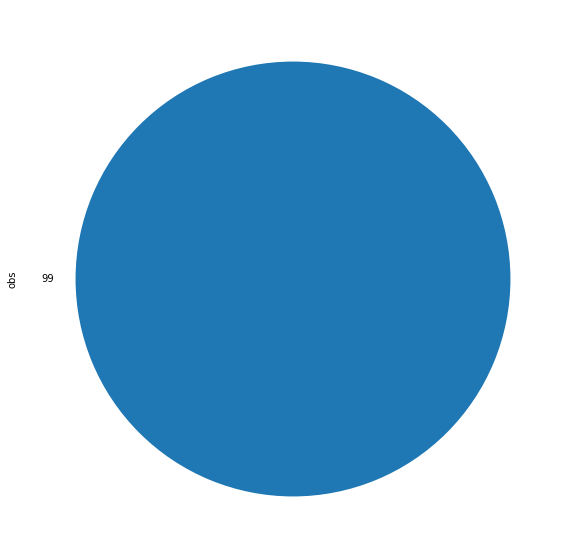

In [39]:
df.obs.value_counts().plot(kind='pie', figsize=(10, 10))
df['obs'].describe()

In [40]:
df = df.drop(['obs'], axis=1)

In [41]:
#pour la variable choc:
for index, row in df.iterrows():
    if row.choc == '1'or row.choc=='2' or row.choc=='3': 
        df.at[index,'choc'] = '1'
    if row.choc == '3'or row.choc=='4'or row.choc=='5' or row.choc=='6':
        df.at[index,'choc']= '4'
    if row.choc=='7'or row.choc=='8'or row.choc=='9': 
        df.at[index,'choc'] = '9'
    if row.choc=='-1' or row.choc=='0':
        df.at[index,'choc'] = '99'

count    198907.000000
mean          2.937921
std           2.373799
min          -1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max           9.000000
Name: choc, dtype: float64

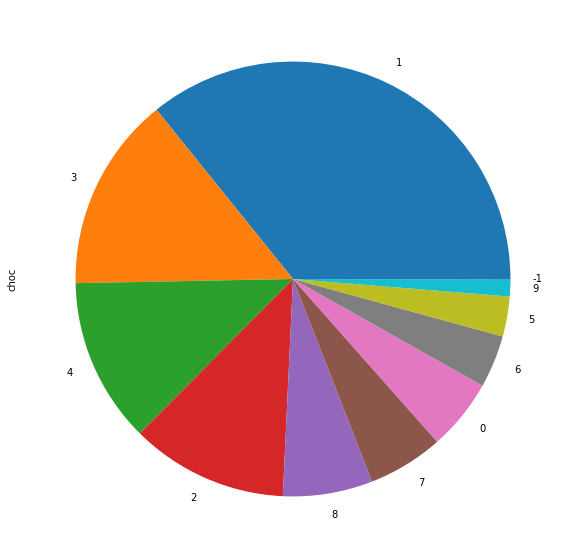

In [42]:
df.choc.value_counts().plot(kind='pie', figsize=(10, 10))
df['choc'].describe()

In [43]:
df = df.drop(['choc'], axis=1)

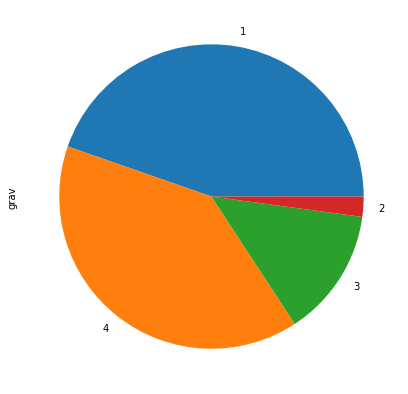

In [44]:
df.grav.value_counts().plot(kind='pie', figsize=(7, 7))

In [45]:
df.grav[df.grav == 1] = 0
df.grav[df.grav == 3] = 0
df.grav[df.grav == 4] = 0
df.grav[df.grav == 2] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

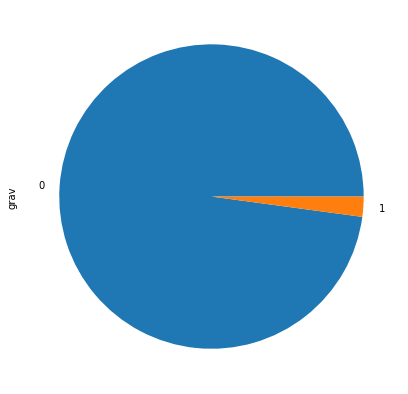

In [46]:
df.grav.value_counts().plot(kind='pie', figsize=(7, 7))

In [47]:
df['grav'].describe()

count    198907.000000
mean          0.021362
std           0.144587
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: grav, dtype: float64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198907 entries, 0 to 198906
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   place   198907 non-null  int64  
 1   catu    198907 non-null  int64  
 2   grav    198907 non-null  int64  
 3   sexe    198907 non-null  int64  
 4   trajet  198907 non-null  int64  
 5   locp    198907 non-null  int64  
 6   catv    198907 non-null  int64  
 7   obsm    198907 non-null  int64  
 8   motor   198907 non-null  int64  
 9   occutc  1791 non-null    float64
 10  catr    198907 non-null  int64  
 11  circ    198907 non-null  int64  
 12  nbv     198907 non-null  int64  
 13  prof    198907 non-null  int64  
 14  plan    198907 non-null  int64  
 15  surf    198907 non-null  int64  
 16  vma     198907 non-null  int64  
 17  mois    198907 non-null  int64  
 18  hrmn    198907 non-null  object 
 19  lum     198907 non-null  int64  
 20  agg     198907 non-null  int64  
 21  int     19

In [49]:
df['place'] = df['place'].astype(object)
df['catu'] = df['catu'].astype(object)
df['sexe'] = df['catu'].astype(object)
df['trajet'] = df['trajet'].astype(object)
df['locp'] = df['locp'].astype(object)



df['catv'] = df['catv'].astype(object)
df['obsm'] = df['obsm'].astype(object)
df['motor'] = df['motor'].astype(object)
df['catr'] = df['catr'].astype(object)
df['circ'] = df['circ'].astype(object)
df['prof'] = df['prof'].astype(object)
df['plan'] = df['plan'].astype(object)
df['surf'] = df['surf'].astype(object)
df['mois'] = df['mois'].astype(object)
df['lum'] = df['lum'].astype(object)
df['agg'] = df['agg'].astype(object)
df['int'] = df['int'].astype(object)
df['atm'] = df['atm'].astype(object)
df['col'] = df['col'].astype(object)
df['secu'] = df['secu'].astype(object)

# Analyse univariée (distribution des valeurs des variables)

Dans cette partie, nous allons explorer les variables une par une. Nous devons garder à l'esprit que le fait de ne regarder qu'une seule variable à la fois peut ne pas nous donner suffisamment d'informations pour comprendre l'ensemble de données et la relation entre les variables. C'est là que l'analyse bivariée (et multivariée) vient à la rescousse.

La méthode diffère selon que la variable est catégorielle ou numérique. Nous avons beaucoup de variables et la plupart d'entre elles sont catégorielles. Nous ne ferons pas une analyse approfondie de chacun, mais la variable catégorique peut être facilement explorée avec un diagramme circulaire. 

Traçons nos variables numériques et voyons s'il est logique de calculer leur moyenne et leur variance.

In [50]:
df.dtypes # which variables are categorical and which are numerical?

place      object
catu       object
grav        int64
sexe       object
trajet     object
locp       object
catv       object
obsm       object
motor      object
occutc    float64
catr       object
circ       object
nbv         int64
prof       object
plan       object
surf       object
vma         int64
mois       object
hrmn       object
lum        object
agg        object
int        object
atm        object
col        object
secu       object
dtype: object

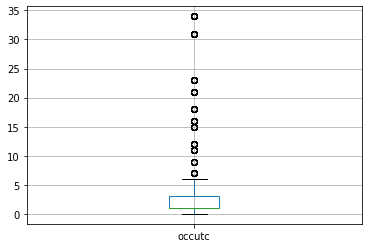

In [51]:
df.boxplot(column=['occutc']) # number of people in the public transit vehicle


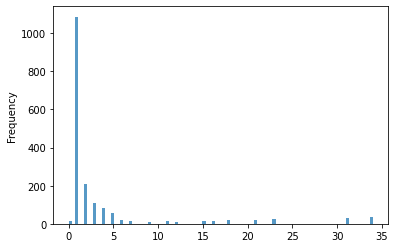

In [52]:
df.occutc.plot.hist(bins=100, alpha=0.75) # number of people in the public transit vehicle


In [53]:
df['occutc'].describe() # number of people in the public transit vehicle
df.occutc.value_counts() # number of people in the public transit vehicle

1.0     1087
2.0      209
3.0      110
4.0       81
5.0       59
34.0      35
31.0      31
23.0      24
21.0      21
6.0       19
18.0      18
16.0      17
7.0       16
11.0      15
15.0      15
0.0       13
12.0      12
9.0        9
Name: occutc, dtype: int64

Nous avons ici un exemple extrême d'une distribution de données déséquilibrée. Ce qui se passe, c'est que la plupart des accidents ne concernent pas le transport en commun. Donc occutc vaut 0. Mais lorsqu'il s'agit de transport en commun, ce nombre est élevé en raison de la nature même du transport en commun. Nous devrons aborder la répartition inégale plus tard. On peut aussi s'interroger sur l'utilité de cette variable.

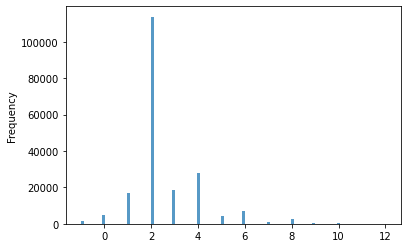

In [54]:
df.nbv.plot.hist(bins=100, alpha=0.75) # number of lanes on the road


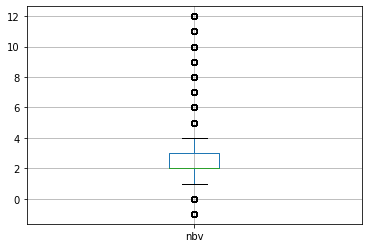

In [55]:
df.boxplot(column=['nbv']) # number of lanes on the road


In [56]:
df['nbv'].describe() # number of lanes on the road


count    198907.000000
mean          2.573424
std           1.516636
min          -1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          12.000000
Name: nbv, dtype: float64

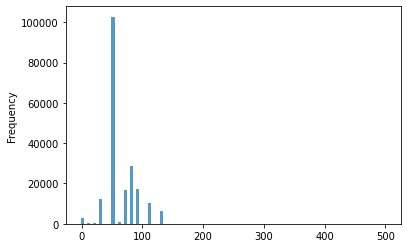

In [57]:
df.vma.plot.hist(bins=100, alpha=0.75)


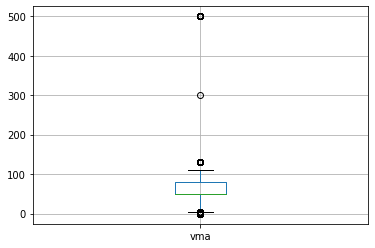

In [58]:
df.boxplot(column=['vma'])


In [59]:
df['vma'].describe() 


count    198907.000000
mean         63.254300
std          25.045737
min          -1.000000
25%          50.000000
50%          50.000000
75%          80.000000
max         500.000000
Name: vma, dtype: float64

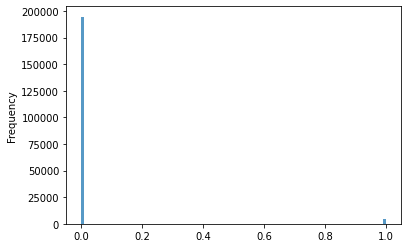

In [60]:
df.grav.plot.hist(bins=100, alpha=0.75) # lethality of the accident (the class we will try to predict)


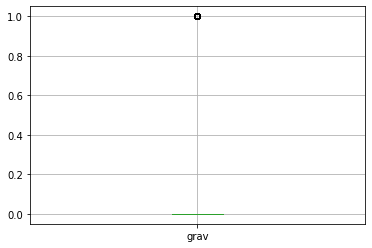

In [61]:
df.boxplot(column=['grav']) # lethality of the accident (the class we will try to predict)


Comme vu précédemment, les accidents mortels sont sous-représentés, ce qui peut avoir un impact négatif sur les futurs modèles. 

#  Bivariate analysis (variable dependence)


Cette étape est cruciale, car identifier que la relation entre une variable prédictive et la variable cible est linéaire nous permettrait d'utiliser un modèle linéaire simple pour faire une prédiction de classe. Au contraire, une relation non linéaire nous obligerait à utiliser un modèle non linéaire pour obtenir les meilleures performances. Quoi qu'il en soit, il est recommandé de commencer par un modèle linéaire simple et de ne passer à un modèle plus complexe ou non linéaire que s'il ne donne pas suffisamment de résultats.

Nous avons également expliqué comment nous devrions essayer de supprimer les variables prédictives qui ne sont pas corrélées à la variable cible. L'analyse univariée peut être naïve à cet effet. Le fait que la corrélation univariée entre une variable prédictive et la variable cible soit faible ne signifie pas nécessairement que cette variable prédictive est inutile : une variable prédictive combinée à d'autres variables prédictives pourrait avoir une corrélation significative avec la variable cible.

De plus, la détection de la corrélation entre les variables prédictives signifie qu'un modèle plus simple (meilleur) avec moins de fonctionnalités peut exister. C'est là que nous pourrions utiliser la réduction de dimensionnalité comme PCA ou Autoencoders, ou la sélection de fonctionnalités comme RFE.

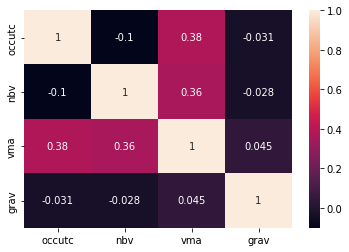

In [62]:
import seaborn as sn
import matplotlib.pyplot as plt

numericVariables = pd.DataFrame(df,columns=['occutc','nbv','vma','grav'])
corrMatrix = numericVariables.corr(method='pearson') # linear relationships

sn.heatmap(corrMatrix, annot=True)
plt.show()

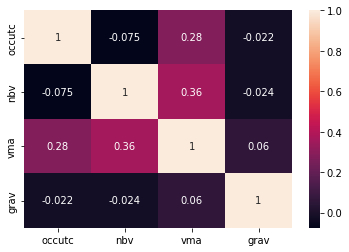

In [63]:
numericVariables = pd.DataFrame(df,columns=['occutc','nbv','vma','grav'])
corrMatrix = numericVariables.corr(method='spearman') # monotonic relationships

sn.heatmap(corrMatrix, annot=True)
plt.show()

Il semble qu'il n'y ait pas de relation bivariée  trés forte entre nos variables numériques.


**Examinons les relations entre les variables prédictives catégorielles et la variable cible.**

Nous ne montrerons que les variables les plus intéressantes, c'est-à-dire celles qui sont corrélées au décès lors d'un accident.

In [64]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np

# must pass data to a contingency table first

# lighting conditions
crosstab = pd.crosstab(df['lum'], df['grav']) 
#print(crosstab)
stat, p, dof, expected = chi2_contingency(crosstab)
print(p)
# we can reject the null hypothesis if the p-value is less than 0.05, and say there is no correlation

1.0635680148867049e-225


L'hypothèse nulle mise à part, on peut voir quelque chose de vraiment intéressant en plongeant dans le tableau de contingence. Cela peut ne pas être évident car la variable catégorielle est nominale et non ordonnée. Mais si nous regardons la description des données, nous pouvons essayer d'en faire une variable ordinale. La variable lum concerne l'éclairage de la route. Si l'on calcule les ratios du nombre de décès par accident pour chaque type de luminosité, on constate que plus il fait sombre, plus les accidents sont meurtriers.

In [65]:
#secu
crosstab = pd.crosstab(df['secu'], df['grav'])
#print(crosstab)
stat, p, dof, expected = chi2_contingency(crosstab)
print(p)

0.0


In [66]:
# type of vehicle
crosstab = pd.crosstab(df['catv'], df['grav'])
stat, p, dof, expected = chi2_contingency(crosstab)
print(p)

1.0063898391817721e-188


In [67]:
# whether the person is a driver (1), passenger (2), or pedestrian (3)
crosstab = pd.crosstab(df['catu'], df['grav'])
stat, p, dof, expected = chi2_contingency(crosstab)
print(p)

2.545401096828951e-100


In [68]:
#agg 
crosstab = pd.crosstab(df['agg'], df['grav'])
stat, p, dof, expected = chi2_contingency(crosstab)
print(p)

1.24706896114275e-310


In [69]:
#int 
crosstab = pd.crosstab(df['int'], df['grav'])
stat, p, dof, expected = chi2_contingency(crosstab)
print(p)

7.167729105529019e-125


In [70]:
#plan 
crosstab = pd.crosstab(df['plan'], df['grav'])
stat, p, dof, expected = chi2_contingency(crosstab)
print(p)

3.189021911421141e-113


In [71]:
#surf
crosstab = pd.crosstab(df['surf'], df['grav'])
stat, p, dof, expected = chi2_contingency(crosstab)
print(p)

8.766617505949256e-08


Après avoir effectué une analyse bivariée sur chaque variable, nous avons plus d'informations sur les variables qui pourraient être inutiles. Mais cela pourrait être trompeur, car il peut y avoir des relations plus complexes que seule une analyse multivariée révélerait. Quoi qu'il en soit, nous ne le ferons pas ici.

Certaines variables prédictives sont supprimées car il semble qu'elles ne soient pas liées à la variable cible :

1. mois (mois)
2. sexe (genre)
3. hrmn (heure de l'accident)
4. prof (profil de route)
5. surf (l'état de la route)

Certaines variables sont supprimées car il semble qu'elles soient corrélées à d'autres variables prédictives et qu'elles ne donnent pas plus d'informations que nous n'en avons déjà :

1.   obsm (obstacle mobile heurté, corrélé à la personne et au lieu de l'accident)

2.   occutc (nombre de personnes dans le véhicule, corrélé au type de véhicule)
3.   nbv (nombre de voies, corrélé au type de route)


In [72]:
df = df.drop(['mois'], axis=1)
df = df.drop(['sexe'], axis=1)
df = df.drop(['hrmn'], axis=1)
df = df.drop(['prof'], axis=1)
df = df.drop(['surf'], axis=1)
df = df.drop(['obsm'], axis=1)
df = df.drop(['occutc'], axis=1)
df = df.drop(['nbv'], axis=1)

In [73]:
df

,place,catu,grav,trajet,locp,catv,motor,catr,circ,plan,vma,lum,agg,int,atm,col,secu
0,1,1,0,5,-1,7,1,4,2,1,50,1,2,3,1,3,0.0
1,1,1,0,5,-1,33,1,4,2,1,50,1,2,3,1,3,0.0
2,1,1,0,5,-1,7,1,4,2,1,50,1,2,3,1,3,2.333333
3,1,1,0,5,-1,33,1,4,2,1,50,1,2,3,1,3,2.333333
4,1,1,0,1,-1,7,1,4,2,3,50,2,2,9,7,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198902,1,1,0,5,0,7,1,3,2,1,50,1,1,1,1,2,0.0
198903,1,1,0,9,0,7,1,3,2,1,50,1,1,1,1,2,0.0
198904,1,1,0,9,0,7,1,3,2,1,50,1,1,1,1,2,0.0
198905,1,1,0,9,-1,32,1,4,-1,1,30,4,2,1,1,6,0.333333


# Préparation des données partie II

**Valeurs manquantes et erronées**

Il y a deux types de mauvaises valeurs auxquelles nous devons faire face :

1. Valeurs erronées -> Nous espérons les avoir toutes détectées et corrigées dans l'analyse exploratoire

2. Valeurs manquantes -> Nous devons les transformer car de nombreux algorithmes ne peuvent pas fonctionner avec eux (régression linéaire, k-means...)

In [74]:
#Missing values
missingvalues=df.isnull()
missingvalues

,place,catu,grav,trajet,locp,catv,motor,catr,circ,plan,vma,lum,agg,int,atm,col,secu
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198902,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198903,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198904,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198905,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
#Total of missing values
totalmissingvaluesnosorted=df.isnull().sum()
totalmissingvaluesnosorted

place     0
catu      0
grav      0
trajet    0
locp      0
catv      0
motor     0
catr      0
circ      0
plan      0
vma       0
lum       0
agg       0
int       0
atm       0
col       0
secu      0
dtype: int64

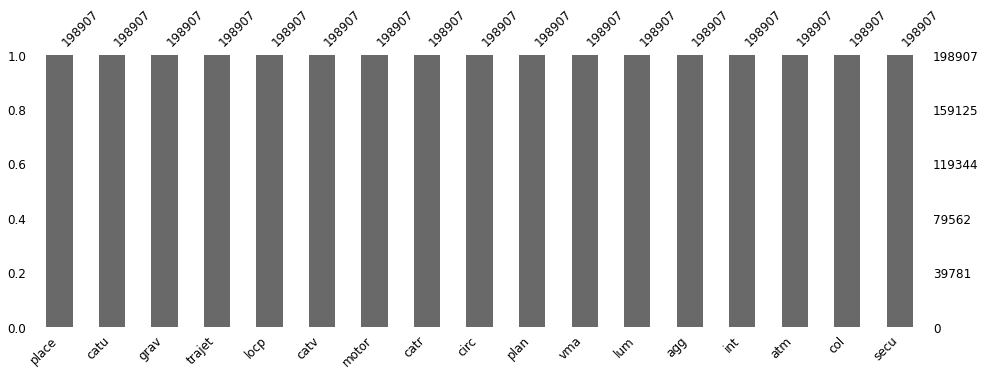

In [76]:
import missingno as mso
plt.figure(1,figsize = (40, 5))
#ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,1)
#mso.matrix(data, ax = ax0, sparkline = False, fontsize = 15)
mso.bar(df, ax = ax1, fontsize = 12)
plt.subplots_adjust(wspace = 0.5)

On remarque que il y a pas de valeurs manquantes.

# Modéles(Machine Learning)

**Remarque**

Précision : Dans quelle mesure notre modèle classe-t-il correctement les cas positifs parmi tous les cas positifs réels ?

Rappel : dans quelle mesure le modèle prédit correctement les cas positifs parmi les cas que le modèle prédit positifs

F1-Score : Un équilibre entre précision et rappel


Imaginez que vous ayez créé un modèle qui prédit toujours un cancer négatif, quel que soit l'exemple que vous allez lui donner. Il s'agit d'un scénario dangereux car un patient atteint de cancer obtiendra toujours une prédiction de ne pas avoir de cancer avec une précision de 90 %.

**Régression linéaire**

Nous utiliserons scikit-learn pour prédire la variable de classe. Scikit-learn ne gère pas très bien les variables catégorielles, nous devons donc commencer par appliquer une analyse des correspondances multiples (MCA) pour transformer les variables catégorielles en variables numériques (nous ne touchons pas à la variable cible et la gardons intacte dans la base de données principale). Il s'agit d'une ACP pour les variables catégorielles. La première étape consiste à effectuer un encodage à chaud avec pandas.get_dummies().

MCA est à l'origine destiné à la réduction de la dimensionnalité, mais dans notre cas, nous le subvertissons pour la coulée numérique. On peut donc profiter du MCA pour faire de la réduction de dimensionnalité, mais ce n'est pas obligatoire si on ne veut pas perdre d'information. Le modèle peut gérer lui-même toutes les informations.

Pourquoi ne pas faire un seul encodage à chaud ?

Parce que nous nous retrouverions avec beaucoup de variables
Et il est plus difficile de faire un modèle de prédiction dans un espace de grande dimension
Et les variables muettes valent souvent 0 et sont inutiles
Au contraire, MCA produit des variables intelligentes car il met en évidence les plus importantes :

Le premier axe contient le plus d'informations (variance)
Le deuxième axe contient le plus d'informations parmi les axes orthogonaux à 1 et ainsi de suite...
L'exécution du MCA déclenche une MemoryError (même sur Python3 64 bits). Il y a trop de données à gérer. Que ce soit l'occasion de faire un rééchantillonnage sur la distribution variable cible. Cela réduira considérablement le nombre de lignes utilisées pour le MCA.

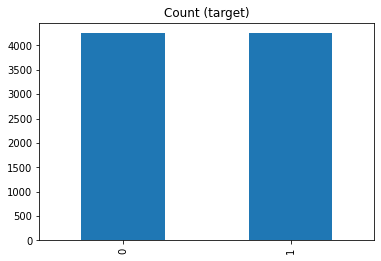

In [77]:
# resampling

# class count
count_class_0, count_class_1 = df.grav.value_counts()

# divide by class
df_class_0 = df[df['grav'] == 0]
df_class_1 = df[df['grav'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.grav.value_counts().plot(kind='bar', title='Count (target)');

In [78]:
X = df_test_under.drop('grav', axis=1)
y = df_test_under['grav']
dfbin=pd.get_dummies(X)

In [79]:
!pip install mca

  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6025 sha256=65496616b36eb6657b572a9a662b43a2e9dea1e592ae8e40e433d48cb52f6400
  Stored in directory: /root/.cache/pip/wheels/00/46/2a/acfca530ddd1e1d72271e07cb7517611d10cd6bcd05cd0cf34
Successfully built mca


In [80]:
import mca

#dfbin=pd.get_dummies(X)
acm=mca.MCA(dfbin)
# we can do dimensionality reduction by precising which percentage of the best variables to keep
compressed=acm.fs_r(percent=0.50)
df_numeric = pd.DataFrame(data=compressed)
df_numeric.shape

(8498, 3)

In [81]:
df_numeric.isna().sum() # check that there are no na left


0    0
1    0
2    0
dtype: int64

In [82]:
y.isna().sum() # check that there are no na left


0

**Split data**

In [83]:
from sklearn.model_selection import train_test_split

X = df_numeric
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree, metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, accuracy_score, \
    f1_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization

**Regression linéaire**

In [85]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))

Coefficients: 
 [ 0.07453987 -0.09763006  0.0736415 ]
Mean squared error: 0.25
Coefficient of determination: 0.00


**K-means**

0.6844919786096256
{'n_neighbors': 10}
Precision:	0.6885935301225903
Recall:		0.6852065491286335
F-measure:	0.6832732204106051


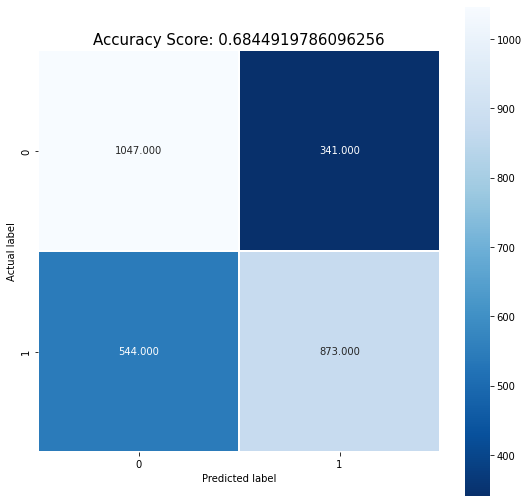

In [86]:

# n_neighbors = Number of neighbors to use by default for kneighbors queries.
param_grid={'n_neighbors': range(2,11,2)} # try different hyper parameters and let GridSearchCV pick up the
knn = GridSearchCV(KNeighborsClassifier(), param_grid)

knn.fit(X_train, y_train)
KNeighborsClassifier()

score = knn.score(X_test, y_test) # simple scoring
print(score)
#score = cross_val_score(knn, X, y, cv=5)  # cross validation
#print(score)
print(knn.best_params_) # best param

y_true = np.array(y_test)
y_pred = np.array(knn.predict(X_test))

# macro: calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
scores = precision_recall_fscore_support(y_true, y_pred, average='macro')
print('Precision:\t' + str(scores[0]))
print('Recall:\t\t' + str(scores[1]))
print('F-measure:\t' + str(scores[2])) 

cm = metrics.confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

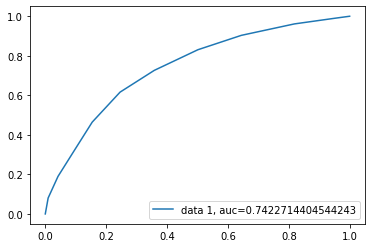

In [87]:
import matplotlib.pyplot as plt
# Test the model using AOC-ROC Graph
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Arbre de décision**

0.6666666666666666
{'max_depth': 6}
Precision:	0.6707635865495489
Recall:		0.6658016388074819
F-measure:	0.6639108124306643


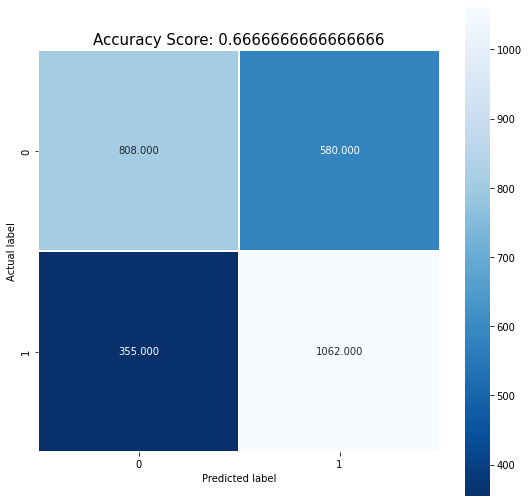

In [88]:
from sklearn.model_selection import train_test_split, \
    cross_val_score, GridSearchCV, ParameterGrid
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, \
    BaggingClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier, \
    VotingClassifier
from sklearn.tree import DecisionTreeClassifier


param_grid={'max_depth': range(3,9,1)}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf = clf.fit(X_train, y_train)

score = clf.score(X_test, y_test) # simple scoring
print(score)

print(clf.best_params_) # best param

y_true = np.array(y_test)
y_pred = np.array(clf.predict(X_test))

# macro: calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
scores = precision_recall_fscore_support(y_true, y_pred, average='macro')
print('Precision:\t' + str(scores[0]))
print('Recall:\t\t' + str(scores[1]))
print('F-measure:\t' + str(scores[2])) 

cm = metrics.confusion_matrix(y_test, clf.predict(X_test))
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

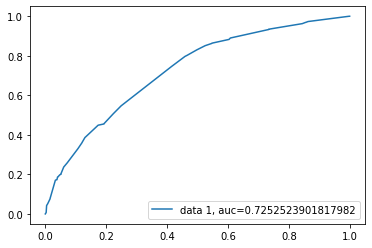

In [89]:
import matplotlib.pyplot as plt
# Test the model using AOC-ROC Graph
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Régression logistique**

0.546524064171123
Precision:	0.5982689425943344
Recall:		0.550147041177631
F-measure:	0.48536089183572445


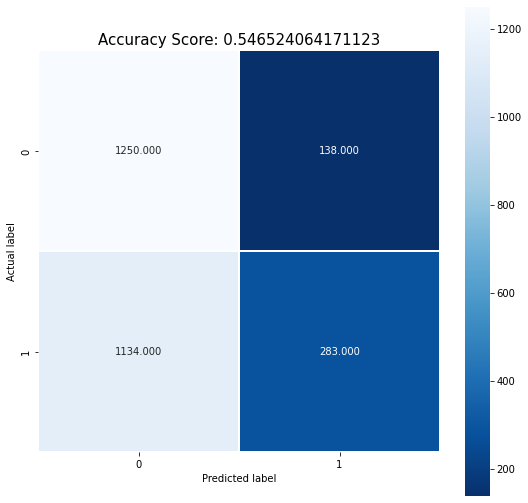

In [90]:
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression()
logRegr.fit(X_train, y_train)


score = logRegr.score(X_test, y_test) # simple scoring
print(score)

y_true = np.array(y_test)
y_pred = np.array(logRegr.predict(X_test))

# macro: calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
scores = precision_recall_fscore_support(y_true, y_pred, average='macro')
print('Precision:\t' + str(scores[0]))
print('Recall:\t\t' + str(scores[1]))
print('F-measure:\t' + str(scores[2])) 

cm = metrics.confusion_matrix(y_test, logRegr.predict(X_test))
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

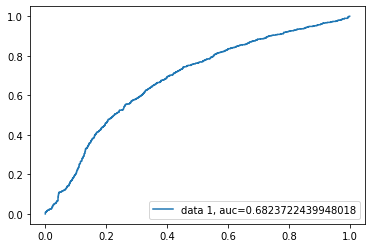

In [91]:
import matplotlib.pyplot as plt
# Test the model using AOC-ROC Graph
y_pred_proba = logRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**SVM**

Precision:	0.6347953738926191
Recall:		0.6342233764965965
F-measure:	0.6335847597940508


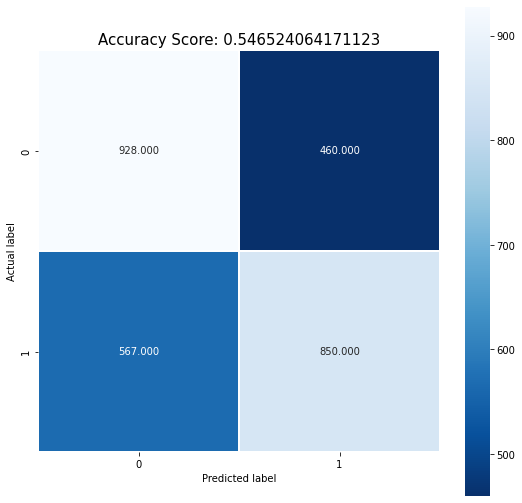

In [92]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)

y_true = np.array(y_test)
y_pred = np.array(lin_clf.predict(X_test))

# macro: calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
scores = precision_recall_fscore_support(y_true, y_pred, average='macro')
print('Precision:\t' + str(scores[0]))
print('Recall:\t\t' + str(scores[1]))
print('F-measure:\t' + str(scores[2])) 

cm = metrics.confusion_matrix(y_test, lin_clf.predict(X_test))
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Precision:	0.6924773485932284
Recall:		0.5024626346606359
F-measure:	0.33711105419966264


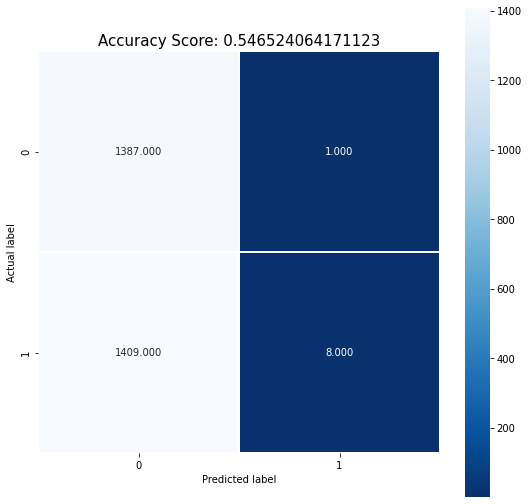

In [93]:
# polynomial svm
poly_clf=SVC(C=1,kernel='poly',degree=2)
poly_clf.fit(X_train,y_train)
y_pred =poly_clf.predict(X_test)
y_true = np.array(y_test)
y_pred = np.array(poly_clf.predict(X_test))

# macro: calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
scores = precision_recall_fscore_support(y_true, y_pred, average='macro')
print('Precision:\t' + str(scores[0]))
print('Recall:\t\t' + str(scores[1]))
print('F-measure:\t' + str(scores[2])) 

cm = metrics.confusion_matrix(y_test, poly_clf.predict(X_test))
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Precision:	0.6030590136873237
Recall:		0.527426077742684
F-measure:	0.4189414056790961


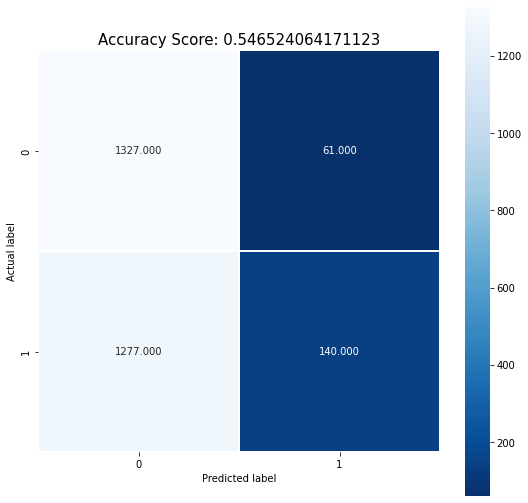

In [94]:
# rbf svm
clf_rbf=SVC(C=1,kernel='rbf',gamma=2)
clf_rbf.fit(X_train,y_train)
y_pred1 =clf_rbf.predict(X_test)

y_true = np.array(y_test)
y_pred = np.array(clf_rbf.predict(X_test))

# macro: calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
scores = precision_recall_fscore_support(y_true, y_pred, average='macro')
print('Precision:\t' + str(scores[0]))
print('Recall:\t\t' + str(scores[1]))
print('F-measure:\t' + str(scores[2])) 

cm = metrics.confusion_matrix(y_test, clf_rbf.predict(X_test))
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**Random forest**

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics

def f1(model,x,y):
    return metrics.f1_score(y, model.predict(x),average='micro')

In [96]:
## tuning with RandomizeSearchCV

n_estimators=[100,500,1000]
criterion=['gini','entropy']
max_depth=[20,40,60,100]
max_feature=['sqrt','log2']

param_grid={
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth,
    'max_features':max_feature
    
}

Randomiz_rf=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid,n_iter=50,cv=3,scoring=f1,return_train_score=True,verbose=2)

In [ ]:
Randomiz_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=500; total time=   3.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=500; total time=   3.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=500; total time=   3.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=1000; total time=   6.2s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=1000; total time=   6.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=1000; total time=   6.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, n_estimators=100; tota

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [20, 40, 60, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 500, 1000]},
                   return_train_score=True,
                   scoring=<function f1 at 0x7fcfb864c710>, verbose=2)

In [ ]:
print(Randomiz_rf.best_params_)
print(Randomiz_rf.best_estimator_)

{'n_estimators': 500, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=500)


In [ ]:
random_rf=RandomForestClassifier(criterion='entropy',max_depth=20, max_features='log2', n_estimators=500)
random_rf.fit(X_train,y_train)
y_random=random_rf.predict(X_test)

Precision:	0.7148285377871684
Recall:		0.7148573752987237
F-measure:	0.7147906227630636


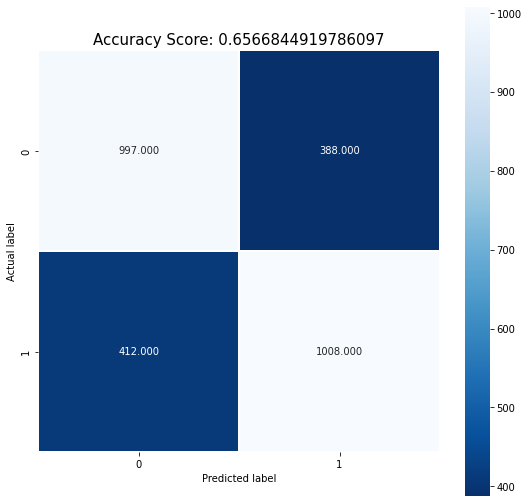

In [ ]:
y_true = np.array(y_test)
y_pred = np.array(random_rf.predict(X_test))

# macro: calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
scores = precision_recall_fscore_support(y_true, y_pred, average='macro')
print('Precision:\t' + str(scores[0]))
print('Recall:\t\t' + str(scores[1]))
print('F-measure:\t' + str(scores[2])) 

cm = metrics.confusion_matrix(y_test, random_rf.predict(X_test))
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

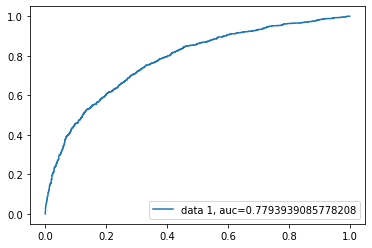

In [ ]:
import matplotlib.pyplot as plt
# Test the model using AOC-ROC Graph
y_pred_proba = random_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#tuning with GridSearchCV
param_grid={'criterion': ['gini'],
 'max_depth': [20,30,40],
 'max_features': ['sqrt'],
 'n_estimators': [900,1000,1100]}

Grid_search_rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=3,scoring=f1,return_train_score=True,verbose=4)

In [ ]:
Grid_search_rf.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=900;, score=(train=0.991, test=0.693) total time=   7.5s
[CV 2/3] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=900;, score=(train=0.989, test=0.676) total time=   5.8s
[CV 3/3] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=900;, score=(train=0.991, test=0.691) total time=   5.8s
[CV 1/3] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=1000;, score=(train=0.991, test=0.690) total time=   6.3s
[CV 2/3] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=1000;, score=(train=0.990, test=0.681) total time=   6.3s
[CV 3/3] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=1000;, score=(train=0.991, test=0.687) total time=   6.1s
[CV 1/3] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=1100;, score=(train=0.991, test=0.688) total time=   6.8s
[CV 2/3] END

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [20, 30, 40],
                         'max_features': ['sqrt'],
                         'n_estimators': [900, 1000, 1100]},
             return_train_score=True, scoring=<function f1 at 0x7fcfb864c710>,
             verbose=4)

In [ ]:
print(Grid_search_rf.best_params_)
print(Grid_search_rf.best_estimator_)

{'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 900}
RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=900)


In [ ]:
random_rf=RandomForestClassifier(criterion='gini',max_depth=30, max_features='sqrt', n_estimators=900)
random_rf.fit(X_train,y_train)
y_random=random_rf.predict(X_test)

Precision:	0.7055840776533178
Recall:		0.7056045660243047
F-measure:	0.7055240127829572


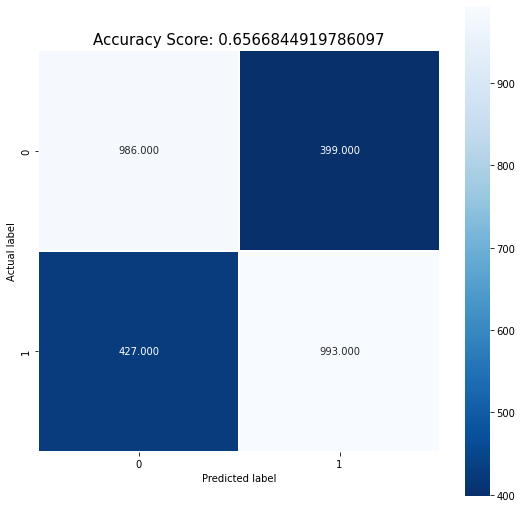

In [ ]:
y_true = np.array(y_test)
y_pred = np.array(random_rf.predict(X_test))

# macro: calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
scores = precision_recall_fscore_support(y_true, y_pred, average='macro')
print('Precision:\t' + str(scores[0]))
print('Recall:\t\t' + str(scores[1]))
print('F-measure:\t' + str(scores[2])) 

cm = metrics.confusion_matrix(y_test, random_rf.predict(X_test))
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

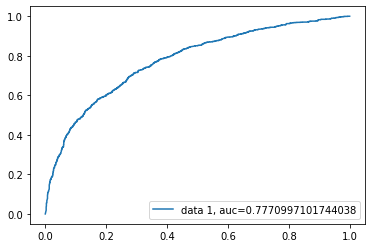

In [ ]:
import matplotlib.pyplot as plt
# Test the model using AOC-ROC Graph
y_pred_proba = random_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Gradient Boosting**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [ ]:
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.203
The mean squared error (MSE) on test set: 0.1991


**H2O**

In [ ]:
!pip install requests
!pip install tabulate
!pip install future

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 176.2 MB 60 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.3-py2.py3-none-any.whl size=176244303 sha256=c88a7ef5e7e9cdc304625d89cee817f02c93474742ecd2f06815ac1cbe29e427
  Stored in directory: /root/.cache/pip/wheels/b5/71/a5/02087a05e5644158183e1c58eeae3f9356a4d1e80659fb2dfb
Successfully built h2o


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14" 2022-01-18; OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqd5a9x7d
  JVM stdout: /tmp/tmpqd5a9x7d/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqd5a9x7d/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_z6vhwa
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df_h2o=h2o.H2OFrame(df,destination_frame='df')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df_h2o.nrows

198907

In [ ]:
train,test= df_h2o.split_frame([0.8])

In [ ]:
train.nrows

159084

In [ ]:
test.nrows

39823

Go to h2o flow to inspect in getFrames to see datasets generated with respective sizes



In [ ]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
mGBM=H2OGradientBoostingEstimator()
mGBM.train([0,1],"grav",train)

gbm Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1647910844319_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,27.0,27.0,3370.0,0.0,5.0,3.074074,1.0,11.0,5.259259




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.020905676805298652
RMSE: 0.14458795525664872
MAE: 0.0418193073689966
RMSLE: 0.10042897853539985
Mean Residual Deviance: 0.020905676805298652

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-03-22 01:22:20,0.091 sec,0.0,0.144768,0.041915,0.020958
1,,2022-03-22 01:22:21,1.182 sec,1.0,0.144733,0.041905,0.020948
2,,2022-03-22 01:22:22,1.561 sec,2.0,0.144705,0.041895,0.020940
3,,2022-03-22 01:22:22,1.783 sec,3.0,0.144683,0.041887,0.020933
4,,2022-03-22 01:22:22,2.085 sec,4.0,0.144664,0.041879,0.020928
5,,2022-03-22 01:22:23,2.386 sec,5.0,0.144649,0.041872,0.020923
6,,2022-03-22 01:22:23,2.628 sec,6.0,0.144637,0.041866,0.020920
7,,2022-03-22 01:22:23,2.874 sec,7.0,0.144627,0.041860,0.020917
8,,2022-03-22 01:22:23,3.059 sec,8.0,0.144620,0.041856,0.020915
9,,2022-03-22 01:22:24,3.328 sec,9.0,0.144613,0.041851,0.020913



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,place,26.611767,1.000000,0.610968
1,catu,16.944956,0.636747,0.389032


In [ ]:
p=mGBM.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Confiance in prediction

In [ ]:
p

predict
0.0202976
0.0510427
0.0202976
0.0202976
0.0202976
0.0202976
0.0202976
0.0202976
0.0202976
0.0202976


In [ ]:
mGBM.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.020639553230208663
RMSE: 0.14366472507267977
MAE: 0.041522566970030726
RMSLE: 0.09979413833904374
Mean Residual Deviance: 0.020639553230208663


In [ ]:
h2o.cluster().shutdown()

H2O session _sid_b523 closed.


**Rédeaux neurones (avec Keras et Tenserflow)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True)

In [ ]:
# split into input (X) and output (Y) variables
X_train = X_train.astype(float)

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

In [ ]:
model = Sequential()
model.add(Dense(16,input_dim=3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16,input_dim=3, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 16)                64        
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_118 (Dense)           (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_119 (Dense)           (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
loss = model.fit(X_train, y_train, batch_size=5000, epochs=40, validation_split=0.3, callbacks=[], verbose=1)

Epoch 1/40
2/2 [==============================] - 1s 304ms/step - loss: 0.6953 - accuracy: 0.4853 - val_loss: 0.6941 - val_accuracy: 0.6065
Epoch 2/40
2/2 [==============================] - 0s 42ms/step - loss: 0.6946 - accuracy: 0.5421 - val_loss: 0.6935 - val_accuracy: 0.6078
Epoch 3/40
2/2 [==============================] - 0s 38ms/step - loss: 0.6938 - accuracy: 0.5765 - val_loss: 0.6929 - val_accuracy: 0.6266
Epoch 4/40
2/2 [==============================] - 0s 46ms/step - loss: 0.6934 - accuracy: 0.5961 - val_loss: 0.6923 - val_accuracy: 0.6174
Epoch 5/40
2/2 [==============================] - 0s 55ms/step - loss: 0.6927 - accuracy: 0.5711 - val_loss: 0.6919 - val_accuracy: 0.5808
Epoch 6/40
2/2 [==============================] - 0s 43ms/step - loss: 0.6922 - accuracy: 0.5539 - val_loss: 0.6914 - val_accuracy: 0.5660
Epoch 7/40
2/2 [==============================] - 0s 42ms/step - loss: 0.6919 - accuracy: 0.5537 - val_loss: 0.6910 - val_accuracy: 0.5542
Epoch 8/40
2/2 [==========

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("score=", score)

score= [0.679477870464325, 0.6388235092163086]


Visualisation de la courbe d'apprentissage

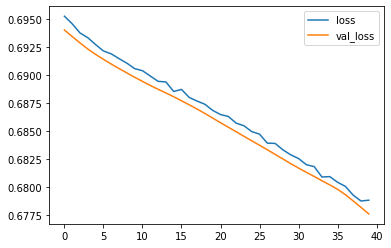

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(loss.history['loss'], label="loss")
plt.plot(loss.history['val_loss'], label="val_loss")
plt.legend()

**Comparasion between Models**

Looking to metrics, we assume that the RandomForest model, gives up the best results with 

- criterion='entropy'
- max_depth=20
- max_features='log2'
- n_estimators=500)


# Prédictions

Il faut préparer la nouvelle data avant de faire quoi que ce soit, déja on a pas trouvé la data de l'année 2021  donc on va faire la prédiction sur la data de l'année 2019 





In [104]:
p = pd.read_csv("usagers-2019 (2).csv",delimiter=";")
v = pd.read_csv("vehicules-2019.csv",delimiter=";")
l = pd.read_csv("lieux-2019.csv", delimiter=";")
r = pd.read_csv("caracteristiques-2019.csv",delimiter=";")

In [106]:
# merge all files together on the 'Num_Acc' key
df_pred = pd.merge(p, v, on=['Num_Acc','Num_Acc'])
df_pred = pd.merge(df_pred, l, on=['Num_Acc','Num_Acc'])
df_pred= pd.merge(df_pred, r, on=['Num_Acc','Num_Acc'])

In [107]:
df_pred

,Num_Acc,id_vehicule_x,num_veh_x,place,catu,grav,sexe,an_nais,trajet,secu1,...,lum,dep,com,agg,int,atm,col,adr,lat,long
0,201900000001,138 306 524,B01,2,2,4,2,2002,0,1,...,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
1,201900000001,138 306 524,B01,2,2,4,2,2002,0,1,...,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
2,201900000001,138 306 524,B01,1,1,4,2,1993,5,1,...,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
3,201900000001,138 306 524,B01,1,1,4,2,1993,5,1,...,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
4,201900000001,138 306 525,A01,1,1,1,1,1959,0,1,...,4,93,93053,1,1,1,2,AUTOROUTE A3,"48,8962100","2,4701200"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253483,201900058839,137 982 131,A01,1,1,3,1,1979,0,2,...,1,78,78640,1,1,1,7,A86 EXT,"48,7772890","2,2237590"
253484,201900058840,137 982 129,B01,1,1,4,1,1974,0,1,...,3,92,92047,1,1,1,2,A13,"48,8351236","2,1751101"
253485,201900058840,137 982 129,B01,1,1,4,1,1974,0,1,...,3,92,92047,1,1,1,2,A13,"48,8351236","2,1751101"
253486,201900058840,137 982 130,A01,1,1,1,1,1971,0,1,...,3,92,92047,1,1,1,2,A13,"48,8351236","2,1751101"


In [108]:
df_pred = df_pred.drop(['Num_Acc'], axis=1)

In [109]:
df_pred = df_pred.drop(['etatp','lartpc','larrout','an','jour','adr', 'lat','long','v1','v2','vosp','pr','pr1','num_veh_x','num_veh_y','senc','situ'], axis=1)

In [110]:
df_pred['secu'] = (df_pred['secu1'] + df_pred['secu2'] + df_pred['secu3'])/3

In [111]:
df_pred = df_pred.drop(['secu1','secu2','secu3'], axis=1)

In [112]:
for index, row in df_pred.iterrows():
    if row.locp == '1' or row.locp =='2': # group by "localisation sur chaussé"
        df_pred.at[index,'locp'] = '1'
    if row.locp == '3' or row.locp== '4': # group by "localisation sur passage piéton"
        df_pred.at[index,'locp'] = '2'
    if row.locp == '5' or row.locp=='6' or row.locp=='7' or row.locp== '8' or row.locp=='9': # group by "localisation est divers"
        df_pred.at[index,'locp'] = '3'
    if row.locp == '0' or row.locp == '-1' : # group by null or other
        df_pred.at[index,'locp'] = '99'

In [113]:
df_pred = df_pred.drop(['id_vehicule_x'], axis=1)
df_pred = df_pred.drop(['an_nais'], axis=1)
df_pred = df_pred.drop(['actp'], axis=1)
df_pred = df_pred.drop(['id_vehicule_y'], axis=1)
df_pred = df_pred.drop(['voie'], axis=1)
df_pred = df_pred.drop(['dep'], axis=1)
df_pred = df_pred.drop(['com'], axis=1)
df_pred = df_pred.drop(['manv'], axis=1)

In [114]:
df_pred = df_pred.drop(['infra'], axis=1)

In [115]:
for index, row in df_pred.iterrows():
    if row.catv == '02': # group by small motorcycle
        df_pred.at[index,'catv'] = '30'
    if row.catv == '31': # group by medium motorcycle
        df_pred.at[index,'catv'] = '32'
    if row.catv == '33': # group by big motorcycle
        df_pred.at[index,'catv'] = '34'
    if row.catv == '38': # group by bus
        df_pred.at[index,'catv'] = '37'
    if row.catv == '04' or row.catv == '05' or row.catv == '06' or row.catv == '08' \
        or row.catv == '09' or row.catv == '18' or row.catv == '19': # group by null or other
        df_pred.at[index,'catv'] = '99'

In [116]:
#pour la variable obs:
for index, row in df_pred.iterrows():
    if row.obs == '1'or row.obs=='2': 
        df_pred.at[index,'obs'] = '1'
    if row.obs == '3'or row.obs=='4'or row.obs=='5':
        df_pred.at[index,'obs']= '3'
    if row.obs == '6'or row.obs=='7'or row.obs=='8'or row.obs=='9'or row.obs=='10'or row.obs=='11'or row.obs=='12'or row.obs=='13': 
        df_pred.at[index,'obs'] = '6'
    if row.obs == '14'or row.obs=='15': 
        df_pred.at[index,'obs'] = '15'
    if row.obs == '16'or row.obs=='17': 
        df_pred.at[index,'obs'] = '16'
    else:
        df_pred.at[index,'obs'] = '99'

In [117]:
df_pred = df_pred.drop(['obs'], axis=1)

In [118]:
#pour la variable choc:
for index, row in df_pred.iterrows():
    if row.choc == '1'or row.choc=='2' or row.choc=='3': 
        df_pred.at[index,'choc'] = '1'
    if row.choc == '3'or row.choc=='4'or row.choc=='5' or row.choc=='6':
        df_pred.at[index,'choc']= '4'
    if row.choc=='7'or row.choc=='8'or row.choc=='9': 
        df_pred.at[index,'choc'] = '9'
    if row.choc=='-1' or row.choc=='0':
        df_pred.at[index,'choc'] = '99'

In [119]:
df_pred = df_pred.drop(['choc'], axis=1)

In [120]:
df_pred.grav[df_pred.grav == 1] = 0
df_pred.grav[df_pred.grav == 3] = 0
df_pred.grav[df_pred.grav == 4] = 0
df_pred.grav[df_pred.grav == 2] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [121]:
df_pred = df_pred.drop(['mois'], axis=1)
df_pred = df_pred.drop(['sexe'], axis=1)
df_pred = df_pred.drop(['hrmn'], axis=1)
df_pred = df_pred.drop(['prof'], axis=1)
df_pred = df_pred.drop(['surf'], axis=1)
df_pred = df_pred.drop(['obsm'], axis=1)
df_pred = df_pred.drop(['occutc'], axis=1)
df_pred = df_pred.drop(['nbv'], axis=1)

In [122]:
df_pred

,place,catu,grav,trajet,locp,catv,motor,catr,circ,plan,vma,lum,agg,int,atm,col,secu
0,2,2,0,0,-1,7,1,1,3,2,70,4,1,1,1,2,0.000000
1,2,2,0,0,-1,17,1,1,3,2,70,4,1,1,1,2,0.000000
2,1,1,0,5,-1,7,1,1,3,2,70,4,1,1,1,2,0.000000
3,1,1,0,5,-1,17,1,1,3,2,70,4,1,1,1,2,0.000000
4,1,1,0,0,-1,7,1,1,3,2,70,4,1,1,1,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253483,1,1,0,0,-1,33,1,1,1,3,50,1,1,1,1,7,0.333333
253484,1,1,0,0,-1,10,2,1,1,1,110,3,1,1,1,2,0.000000
253485,1,1,0,0,-1,10,1,1,1,1,110,3,1,1,1,2,0.000000
253486,1,1,0,0,0,10,2,1,1,1,110,3,1,1,1,2,-0.333333


In [123]:
#Total of missing values
totalmissingvaluesnosorted=df_pred.isnull().sum()
totalmissingvaluesnosorted

place     0
catu      0
grav      0
trajet    0
locp      0
catv      0
motor     0
catr      0
circ      0
plan      0
vma       0
lum       0
agg       0
int       0
atm       0
col       0
secu      0
dtype: int64

On a bien les memes 17 variables et on va faire la prédiction sur 253488 observations.



On va faire un encoder normal ici pour les deux data de 2020 et 2019

In [161]:
#Convert the categorical data into numerical before classification

from sklearn.preprocessing import LabelEncoder
data_train=df.apply(LabelEncoder().fit_transform)

data_train

,place,catu,grav,trajet,locp,catv,motor,catr,circ,plan,vma,lum,agg,int,atm,col,secu
0,0,0,0,6,0,5,2,3,2,1,16,1,1,3,1,3,3
1,0,0,0,6,0,17,2,3,2,1,16,1,1,3,1,3,3
2,0,0,0,6,0,5,2,3,2,1,16,1,1,3,1,3,10
3,0,0,0,6,0,17,2,3,2,1,16,1,1,3,1,3,10
4,0,0,0,2,0,5,2,3,2,3,16,2,1,9,7,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198902,0,0,0,6,1,5,2,2,2,1,16,1,0,1,1,2,3
198903,0,0,0,7,1,5,2,2,2,1,16,1,0,1,1,2,3
198904,0,0,0,7,1,5,2,2,2,1,16,1,0,1,1,2,3
198905,0,0,0,7,0,16,2,3,0,1,12,4,1,1,1,6,4


In [182]:
#Trainig

from sklearn.model_selection import train_test_split

x=data_train.drop('grav', axis=1)
y=data_train['grav']


x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.33)

In [163]:
#Convert the categorical data into numerical before classification

from sklearn.preprocessing import LabelEncoder
data_test=df_pred.apply(LabelEncoder().fit_transform)

data_test

,place,catu,grav,trajet,locp,catv,motor,catr,circ,plan,vma,lum,agg,int,atm,col,secu
0,1,1,0,1,0,4,2,0,3,2,22,3,0,0,1,2,3
1,1,1,0,1,0,10,2,0,3,2,22,3,0,0,1,2,3
2,0,0,0,6,0,4,2,0,3,2,22,3,0,0,1,2,3
3,0,0,0,6,0,10,2,0,3,2,22,3,0,0,1,2,3
4,0,0,0,1,0,4,2,0,3,2,22,3,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253483,0,0,0,1,0,16,2,0,1,3,19,0,0,0,1,7,4
253484,0,0,0,1,0,5,3,0,1,1,26,2,0,0,1,2,3
253485,0,0,0,1,0,5,2,0,1,1,26,2,0,0,1,2,3
253486,0,0,0,1,1,5,3,0,1,1,26,2,0,0,1,2,2


In [172]:
X_test=data_test.drop('grav', axis=1)

On va utiliser le meilleur classifier trouvé dans la partie modéle pour prédire

In [184]:
random_rf=RandomForestClassifier(criterion='entropy',max_depth=20, max_features='log2', n_estimators=500)
random_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=500)

In [185]:
y_random = random_rf.predict(X_test)

In [186]:
y_random = pd.DataFrame({'Gravité':y_random}) 
map_dict = {0: 'Indemme',1:'Tué'}
y_random['Gravité'] = y_random['Gravité'].map(map_dict)

In [180]:
y_random.loc[y_random['Gravité'] == 'Indemme']

,Gravité
0,Indemme
1,Indemme
2,Indemme
3,Indemme
4,Indemme
...,...
253483,Indemme
253484,Indemme
253485,Indemme
253486,Indemme


In [181]:
y_random.loc[y_random['Gravité'] == 'Tué']

,Gravité
944,Tué
1929,Tué
2302,Tué
2303,Tué
2410,Tué
...,...
248149,Tué
249053,Tué
250198,Tué
250265,Tué


Supposons que le gouvernement français n'as pas fait l'analyse des accidents corporels de la circulation routiére de l'année 2019, alors d'aprés notre étude on peut prédire le suivant :  de 253488 accidents corporles en 2019, la plupart (253133) n'étaient pas morteles, alors que seulement 355 accidents qui étaient morteles.